In [2]:
## Loading the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import calendar
from scipy.stats import skew,kurtosis

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Reading the datas:
customer = pd.read_csv("/content/drive/MyDrive/CopyofCustomers.csv")  ### Unique customer id
product = pd.read_csv("/content/drive/MyDrive/CopyofProducts.csv")  ## Product translation to english
transactions = pd.read_csv("/content/drive/MyDrive/CopyofTransactions.csv") ## Transaction information

In [4]:
customer.shape

(200, 4)

In [5]:
product.shape

(100, 4)

In [6]:
transactions.shape

(1000, 7)

In [7]:
print("Customers Data:")
print(customer.head())
print("\nProducts Data:")
print(product.head())
print("\nTransactions Data:")
print(transactions.head())


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [8]:
print("\nMissing Values:")
print("Customers:\n", customer.isnull().sum())
print("Products:\n", product.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())



Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
print("\nDuplicates:")
print("Customers:", customer.duplicated().sum())
print("Products:", product.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())



Duplicates:
Customers: 0
Products: 0
Transactions: 0


In [10]:
customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [11]:
merged_data = transactions.merge(customer, on='CustomerID').merge(product, on='ProductID')

In [12]:
print("\nSummary Statistics:")
print(merged_data.describe())


Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023

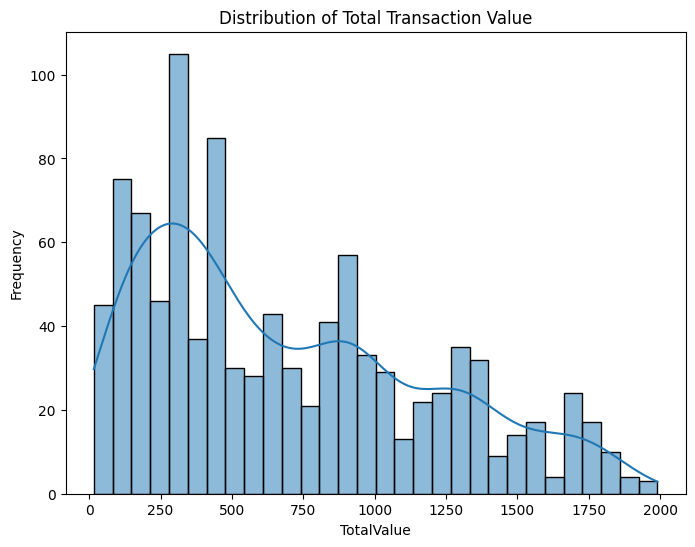

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['TotalValue'], kde=True, bins=30)
plt.title('Distribution of Total Transaction Value')
plt.xlabel('TotalValue')
plt.ylabel('Frequency')
plt.show()


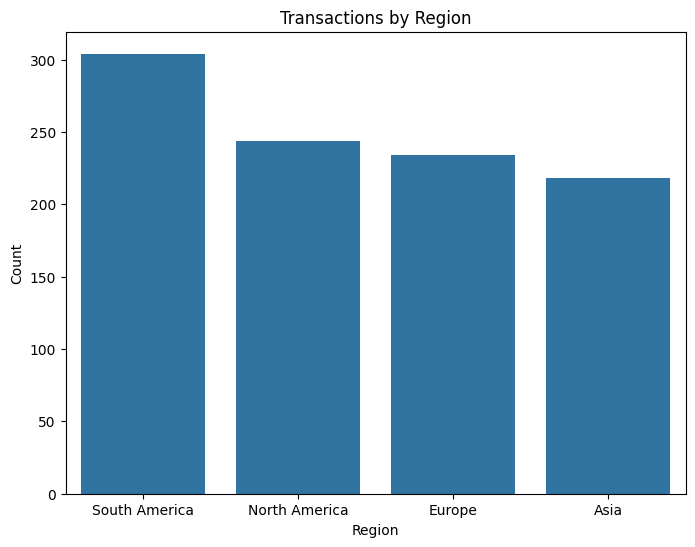

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_data, x='Region', order=merged_data['Region'].value_counts().index)
plt.title('Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


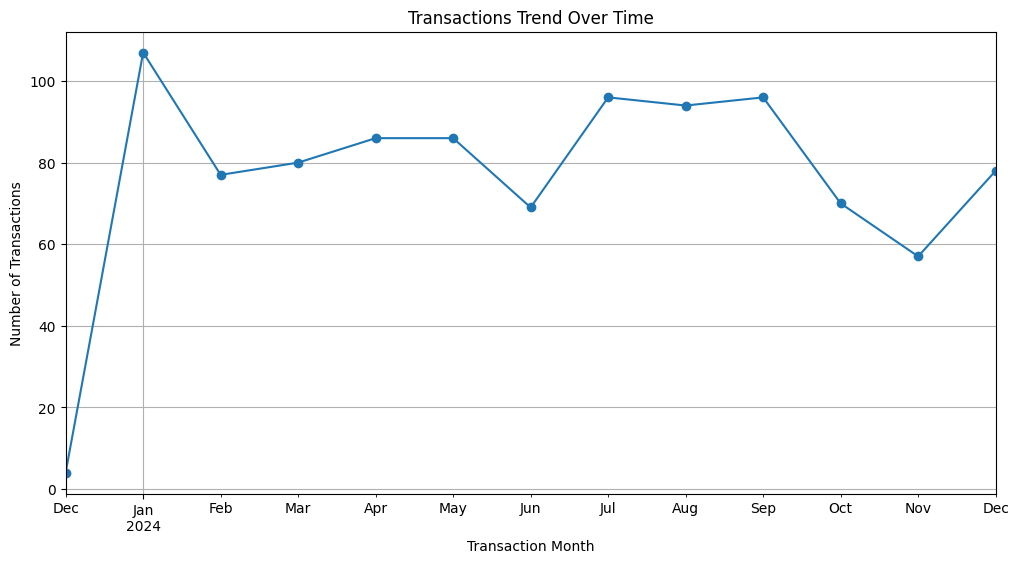

In [17]:
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
transactions_trend = merged_data.groupby('TransactionMonth').size()

plt.figure(figsize=(12, 6))
transactions_trend.plot(kind='line', marker='o')
plt.title('Transactions Trend Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Number of Transactions')
plt.grid()
plt.show()

In [18]:
print("\nTop 5 Products by Total Value:")
print(merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head())


Top 5 Products by Total Value:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64
